In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
data=pd.read_table('SMSSpamCollection.unknown',names=['label','sms_messege'])
data.head()

,label,sms_messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#its encoding method to change this value into 1,0 map () usd to change ,also use get dummies() method,encode()

data['label']=data.label.map({'ham':0,'spam':1})
data.head()

,label,sms_messege
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['sms_messege'],data['label'],random_state=42,test_size=0.2)

In [23]:
print('Number of rows in the table set()',format(data.shape))
print('number of rows in the training set',format(x_train.shape))
print('numner of in the test state',format(x_test.shape))

Number of rows in the table set() (5572, 2)
number of rows in the training set (4457,)
numner of in the test state (1115,)


In [24]:
# text msg could not read machine so convert it into metrics that how many time a wrd repeated
#countvectoraizer() used to count occutrence of the each words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
training_data=count_vector.fit_transform(x_train)
testing_data=count_vector.transform(x_test)

In [22]:
training_data

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59296 stored elements and shape (4457, 7702)>

In [15]:
testing_data

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13781 stored elements and shape (1115, 7702)>

In [16]:
from sklearn.naive_bayes import MultinomialNB
navie_bayes=MultinomialNB()
navie_bayes.fit(training_data,y_train)

MultinomialNB()

In [17]:
prediction=navie_bayes.predict(testing_data)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("accuracy_score ",format(accuracy_score(y_test,prediction)))
print("precision ",format(precision_score(y_test,prediction)))
print('recall_score ',format(recall_score(y_test,prediction)))

accuracy_score  0.9919282511210762
precision  1.0
recall_score  0.9395973154362416


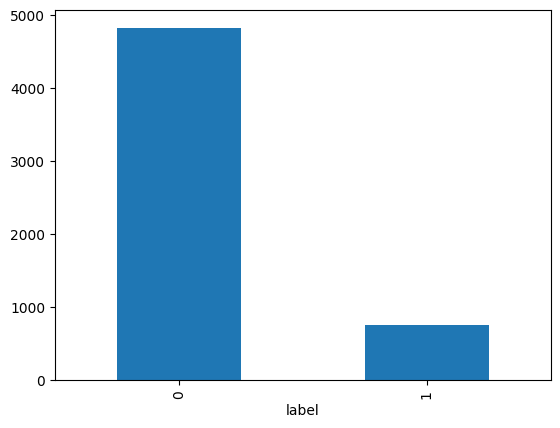

In [19]:
data['label'].value_counts().plot(kind='bar')
plt.show()